In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [2]:
import tensorflow as tf
import numpy as np
from tensorflow.contrib import rnn

In [4]:
timesteps = seq_length = 7

data_dim = 5
output_dim =1


In [6]:
xy = np.loadtxt('data-02-stock_daily.csv', delimiter=',')

In [7]:
def MinMaxScaler(data):
    ''' Min Max Normalization
    Parameters
    ----------
    data : numpy.ndarray
        input data to be normalized
        shape: [Batch size, dimension]
    Returns
    ----------
    data : numpy.ndarry
        normalized data
        shape: [Batch size, dimension]
    References
    ----------
    .. [1] http://sebastianraschka.com/Articles/2014_about_feature_scaling.html
    '''
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # noise term prevents the zero division
    return numerator / (denominator + 1e-7)

In [9]:
xy = xy[::-1]
xy = MinMaxScaler(xy)
x = xy
y = xy[:,[-1]]

In [10]:
dataX = []
dataY = []
for i in range(0,len(y)- seq_length):
    _x = x[i:i + seq_length]
    _y = y[i+seq_length]
    print(_x, "->", _y)
    dataX.append(_x)
    dataY.append(_y)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
 [0.15782902 0.15470702 0.12791016 0.60962624 0.12692483]
 [0.1207904  0.11770961 0.11162416 0.22934481 0.10512477]] -> [0.12316526]
[[0.11044525 0.12724798 0.11435324 0.35107108 0.11089532]
 [0.12705592 0.1390988  0.12324434 0.23008873 0.11649107]
 [0.12288872 0.12276776 0.09067269 0.34481491 0.12791587]
 [0.14089803 0.17638508 0.15387945 0.4378686  0.18649648]
 [0.15782902 0.15470702 0.12791016 0.60962624 0.12692483]
 [0.1207904  0.11770961 0.11162416 0.22934481 0.10512477]
 [0.09905103 0.11924158 0.11722888 0.21129336 0.12316526]] -> [0.10022843]
[[0.12705592 0.1390988  0.12324434 0.23008873 0.11649107]
 [0.12288872 0.12276776 0.09067269 0.34481491 0.12791587]
 [0.14089803 0.17638508 0.15387945 0.4378686  0.18649648]
 [0.15782902 0.15470702 0.12791016 0.60962624 0.12692483]
 [0.1207904  0.11770961 0.11162416 0.22934481 0.10512477]
 [0.09905103 0.11924158 0.11722888 0.21129336 0.12316526]
 [0.11405885 0.10952968 0.11353161 0.18323922 0.10022843]] -

In [11]:
train_size = int(len(dataY) * 0.7)
test_size = len(dataY) - train_size

trainX, testX = np.array(dataX[0:train_size]), np.array(dataX[train_size:len(dataX)])
trainY, testY = np.array(dataY[0:train_size]),np.array(dataY[train_size:len(dataY)])

In [13]:
X= tf.placeholder(tf.float32, [None, seq_length, data_dim])
Y = tf.placeholder(tf.float32, [None, 1])

In [15]:
hidden_dim = 10
cell = rnn.BasicLSTMCell(num_units=hidden_dim, state_is_tuple=True)

outputs,_states = tf.nn.dynamic_rnn(cell,X,dtype=tf.float32)

Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Please use `layer.add_weight` method instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [16]:
Y_pred = tf.contrib.layers.fully_connected(
    outputs[:,-1], output_dim, activation_fn= None
)

Instructions for updating:
Please use `layer.__call__` method instead.


In [17]:
loss = tf.reduce_sum(tf.square(Y_pred-Y))
optimizer = tf.train.AdamOptimizer(0.01)
train = optimizer.minimize(loss)

In [18]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for i in range(1000):
    _, l = sess.run([train,loss], feed_dict={X:trainX,Y:trainY})
    print(i,l)

testPredict = sess.run(Y_pred, feed_dict ={X:testX})

0 109.012146
1 59.658287
2 26.285679
3 8.792394
4 6.23563
5 13.5625725
6 19.76265
7 19.669655
8 15.300847
9 9.905942
10 5.6318116
11 3.2805207
12 2.7138042
13 3.3357563
14 4.4501605
15 5.4762764
16 6.051297
17 6.0391054
18 5.4828596
19 4.54178
20 3.4321768
21 2.3770318
22 1.5632985
23 1.1070974
24 1.0306027
25 1.258088
26 1.6385217
27 1.9944339
28 2.1823683
29 2.139235
30 1.8935375
31 1.5397006
32 1.1924205
33 0.9435167
34 0.8367394
35 0.8644992
36 0.9815082
37 1.1263756
38 1.2426765
39 1.2938249
40 1.2694074
41 1.1833276
42 1.0658066
43 0.9521906
44 0.8717494
45 0.8394496
46 0.8528948
47 0.89517206
48 0.9424063
49 0.97304213
50 0.975216
51 0.94952726
52 0.9067139
53 0.8619382
54 0.828501
55 0.8134762
56 0.8164566
57 0.8311668
58 0.8487393
59 0.86118674
60 0.863891
61 0.85651785
62 0.8423642
63 0.826612
64 0.8142257
65 0.80822694
66 0.80889267
67 0.814046
68 0.8202193
69 0.82414854
70 0.8239877
71 0.8197967
72 0.81321007
73 0.80653745
74 0.8017471
75 0.79975563
76 0.8002537
77 0.802043

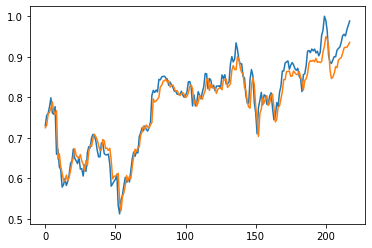

In [19]:
import matplotlib.pyplot as plt
plt.plot(testY)
plt.plot(testPredict)
plt.show()